# **Exame - Introdução ao Processamento Digital de Imagens**
##Nome: Gabriela Jachs Stepien

#**Questão 2)**

Utilizando as suas funções para execução do fechamento e abertura em imagens em python, execute a filtragem de elementos "pequenos", isto é, as estrelas pequenas da imagem "Fig0334" do capítulo 3, do livro texto de González. Plote, a imagem original e a imagem filtrada, uma ao lado da outra. Discuta qualitativamente o resultado de sua filtragem. 



In [29]:
#importação das bibliotecas a serem utilizadas
import matplotlib.pyplot as plt
from skimage.draw import circle
import numpy as np
%matplotlib inline
import cv2

##***Binarização***

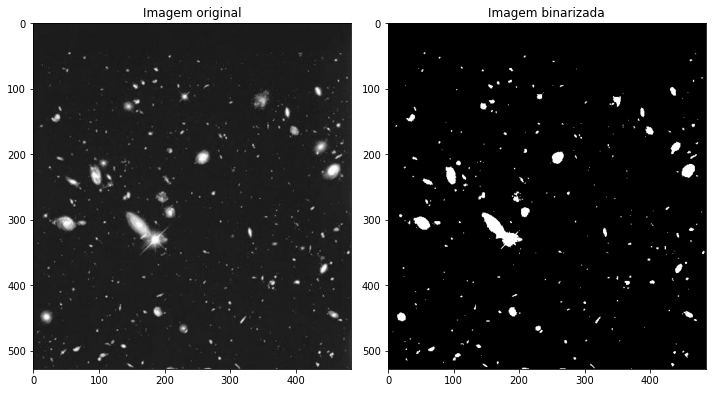

In [30]:
#binarização
#importando a imagem a ser utilizada
img = cv2.imread('/content/Fig0334(a)(hubble-original).tif', cv2.IMREAD_GRAYSCALE)
img_bin = img.copy()

threshold = 120
img_bin[img >= threshold] = 255
img_bin[img < threshold] = 0

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Imagem binarizada')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Erosão***

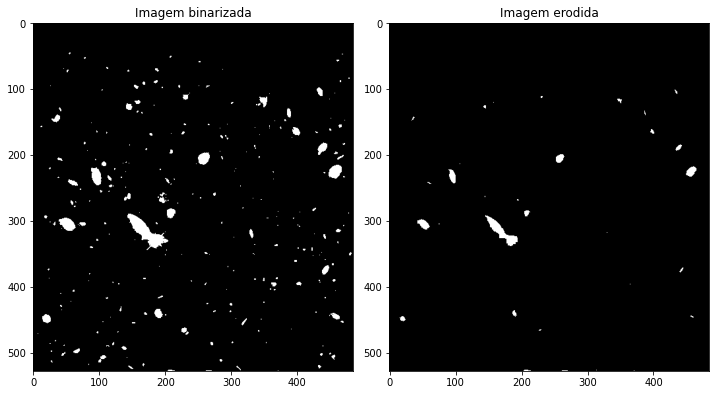

In [31]:
#erosao
""" A erosão é a função onde ela vai remover detalhes finos em uma imagem com o filtro (kernel) """
#declarando o elemento estruturante, o qual vai ser utilizado nos filtros nas funções
estruturante = np.ones((5,5))

def erosao(img, s): #iniciando a erosão
    borda = (s.shape[0]-1)//2
    altura, largura = img.shape #altura e largura da imagem, suas dimensões
    img_saida = np.copy(img) #aqui é onde a imagem de saída vai ser armazenada pela matriz

    for x in range(borda, altura-borda): # iniciando a operação de erosão da imagem
        for y in range(borda, largura-borda): #verificando se o filtro está sobreposto à uma região da imagem
            if np.mean(img[x-borda:x+borda+1, y-borda:y+borda+1]*s) != 255: 
                img_saida[x,y] = 0 #redirecionamento da imagem de saída

    return img_saida

img_erodida = erosao(img_bin,estruturante) #chamando a função para realizar a erosão da imagem binarizada

plt.figure(figsize=(15,15)) #plot para comparação entre as imagens

plt.subplot(1,3,1)
plt.title('Imagem binarizada')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem erodida')
plt.imshow(img_erodida, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Dilatação***

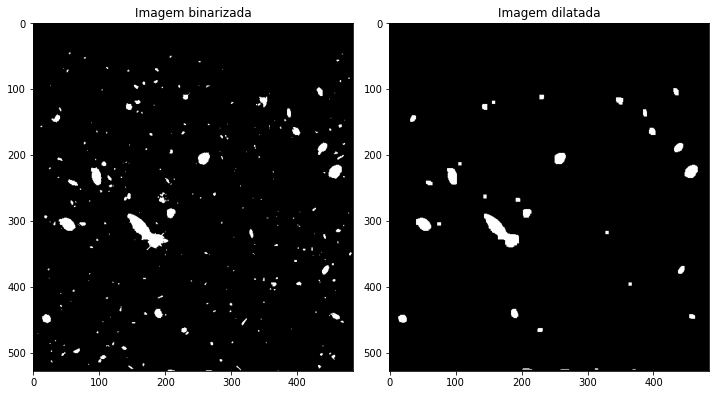

In [32]:
#dilatacao
#declarando o elemento estruturante, o qual vai ser utilizado nos filtros nas funções
estruturante = np.ones((5,5))

def dilatacao(img, s): #iniciando a dilatação
    borda = (s.shape[0]-1)//2
    altura, largura = img.shape
    max_bin = img.max()
    min_bin = img.min()
    img_saida = np.zeros((altura,largura))
    for x in range(borda, altura-borda): #dilatação da imagem: operação
        for y in range(borda, largura-borda): #verificando se houve sobreposição na imagem
            if np.sum(img[x-borda:x+borda+1, y-borda:y+borda+1]*s) != min_bin:
              #substituindo os valores pelo valor máximo
                img_saida[x,y] = max_bin

    return img_saida

img_dilatada = dilatacao(img_erodida,estruturante) #chamando a função para realizar a dilatação da imagem erodida

plt.figure(figsize=(15,15)) #plot para comparação entre as imagens

plt.subplot(1,3,1)
plt.title('Imagem binarizada')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem dilatada')
plt.imshow(img_dilatada, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()